In [1]:
%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

In [3]:
lena = misc.imread('images/LENA_512.jpg')
ship = misc.imread('images/statek_640_505.jpg')

In [8]:
def greyscale(picture):
    grey_picture = np.copy(picture)
    for row in grey_picture:
        for col in row:
            col[0] = col[1] = col[2] = (int(col[0]) + int(col[1]) + int(col[2]))/3
    return grey_picture

In [71]:
def histogramrgb (picture):
    r = [0 for _ in xrange(256)]
    g = [0 for _ in xrange(256)]
    b = [0 for _ in xrange(256)]
    for x in picture:
        for y in x:
            r[y[0]] += 1
            g[y[1]] += 1
            b[y[2]] += 1
    plt.plot(range(256), r, 'r-')
    plt.plot(range(256), g, 'g-')
    plt.plot(range(256), b, 'b-')
    plt.axis([0, 255, 0, max(max(r),max(g),max(b))])
    plt.show()

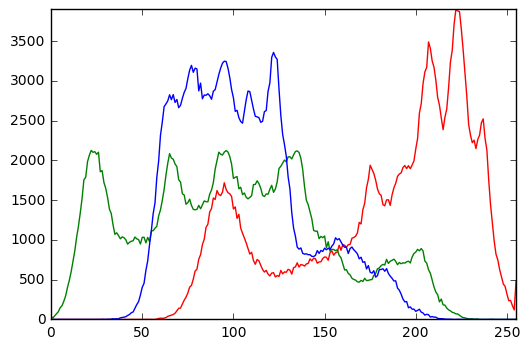

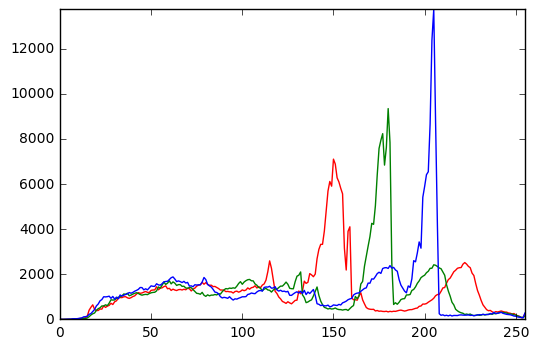

In [74]:
histogramrgb(lena)
histogramrgb(ship)

In [73]:
def histogramk (picture):
    k = [0 for _ in xrange(256)]
    for x in picture:
        for y in x:
            k[(int(y[0])+int(y[1])+int(y[2]))/3] += 1
    plt.plot(range(256), k, 'k-')
    plt.axis([0, 255, 0, max(k)])
    plt.show()

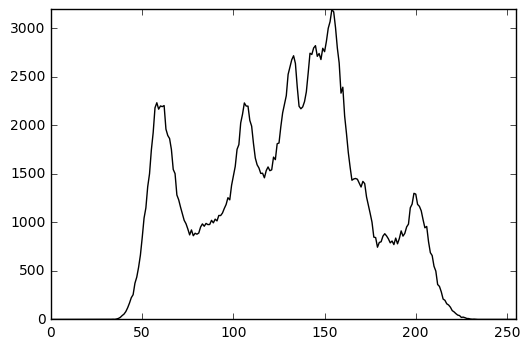

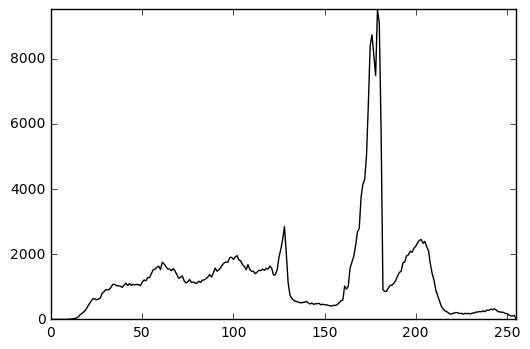

In [75]:
histogramk(lena)
histogramk(ship)